# WEB SERVICE 

## Météo

### Exercice 1: Service Météo

In [13]:
import argparse
import requests
import json
from flask import jsonify, Flask, render_template, request, url_for

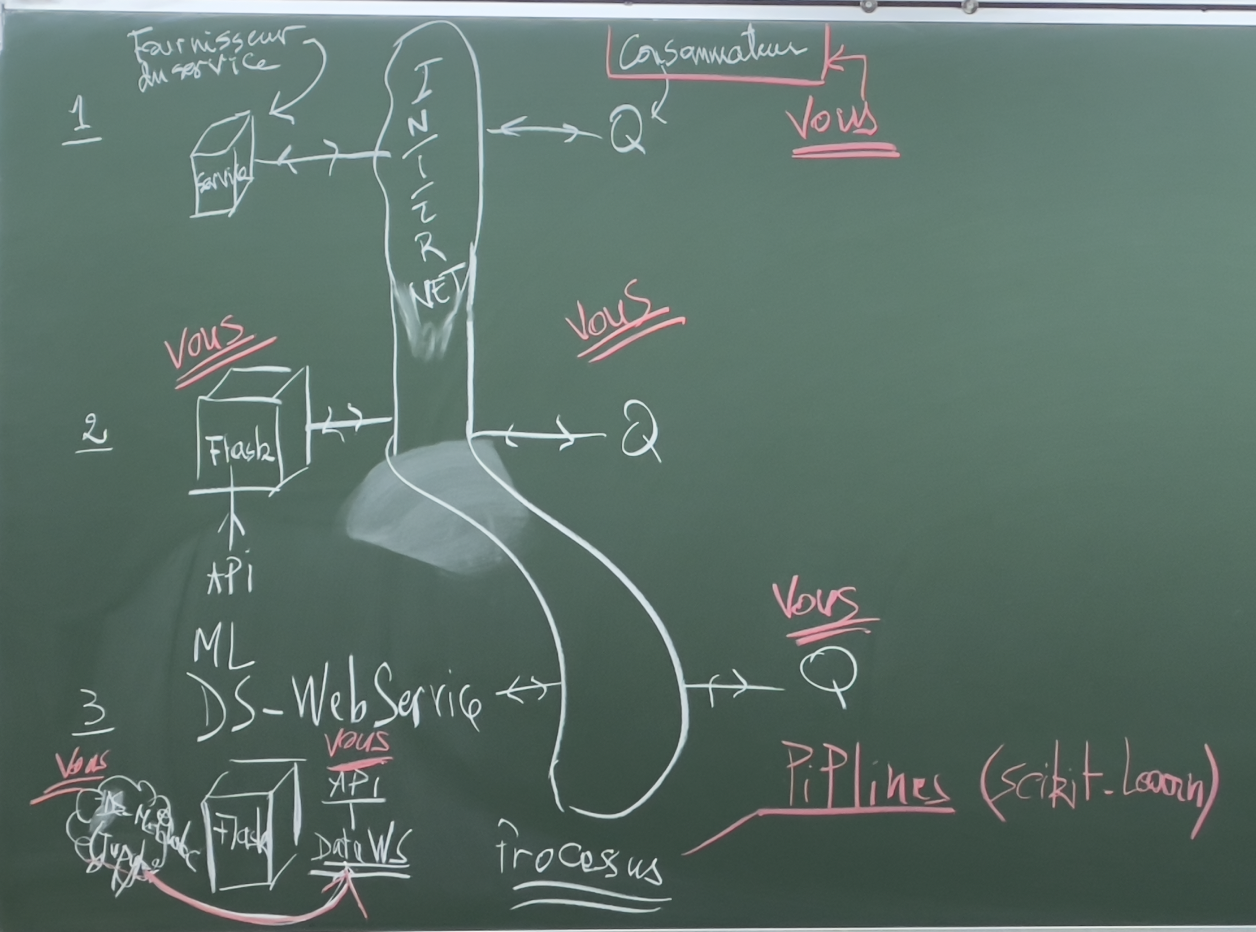

### Example 1

result = {
    "success": 
    "name":
    "country":
    "weather_text":
    "weather_icon":
    "temp":
    "feels_like":
    "temp_min":
    "temp_max":
    "humidity":
    "pressure":
    "visibility":
    "wind": {
        "speed":
        "direction":
        "degree":
        "gust":
    },
    "uv": {
        "index",
        "text":
    },
    "cloud":
    "precipitation":
}

In [ ]:
# Meter to Km
def m_to_km(distance):
    return distance/1000

In [ ]:
# Meter/second to Km/h
def ms_to_kmh(speed):
    return speed*3.6

In [ ]:
# Kelvin to Celsius
def kelvin_to_celsius(temp):
    return temp - 273.15

In [ ]:
def current_weather_by_openweather(city):
    API_KEY = '3ad5d1c1d3bdf0fa4aa4bc5b3ee6482f'  

#     url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + " &APPID=" + API_KEY

    # coordonnate -> long, lat
    if "," in city:
        position = city.replace(" ", "").split(",") # remove space then split by , -> long, lat
        url = "http://api.openweathermap.org/data/2.5/weather?lat=" + position[0] + "&lon=" + position[1] + "&APPID=" + API_KEY
    else: # city
        url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + " &APPID=" + API_KEY

    response = requests.get(url).json()
    
    if (response["cod"] != 200):
        result = {
            "success": False
        }
    else:
        result = {
            "success": True,
            "name": response["name"],
            "country": response["sys"]["country"],
            "weather_text": response["weather"][0]["description"],
            "weather_icon": "https://s3-us-west-2.amazonaws.com/s.cdpn.io/162656/" + response["weather"][0]["icon"] + ".svg",
            "temp": round(kelvin_to_celsius(response["main"]["temp"])),
            "feels_like": round(kelvin_to_celsius(response["main"]["feels_like"])),
            "temp_min": round(kelvin_to_celsius(response["main"]["temp_min"])),
            "temp_max": round(kelvin_to_celsius(response["main"]["temp_max"])),
            "humidity": response["main"]["humidity"],
            "pressure": response["main"]["pressure"],
            "visibility": m_to_km(response["visibility"]),
            "wind": {
                "speed": round(ms_to_kmh(response["wind"]["speed"]),2),
                "direction": "none",
                "degree": response["wind"]["deg"],
#                 "gust": response["wind"]["gust"],
            },
            "uv": {
                "index": "none",
                "text": "none",
            },
            "cloud": response["clouds"]["all"],
            "probability_precipitation": "none",
            "precipitation": "none"
        }
    return result

In [ ]:
def current_weather_by_weatherapi(city):
    uv_text = ["Low","Low","Low","Moderate","Moderate","Moderate","High","High","Very high","Very high","Very high","Extreme"]
    
    API_KEY = 'cb651958a07d4811919221816211010'  

    url = "http://api.weatherapi.com/v1/forecast.json?key=" + API_KEY + "&q=" + city

    response = requests.get(url).json()
    
    if ("error" in response):
        # if weatherAPI fails -> use OpenWeather instead
        result = current_weather_by_openweather(city)
    else:
        result = {
            "success": True,
            "name": response["location"]["name"],
            "country": response["location"]["country"],
            "weather_text": response["current"]["condition"]["text"],
            "weather_icon": "https:" + response["current"]["condition"]["icon"],
            "temp": int(response["current"]["temp_c"]),
            "feels_like": int(response["current"]["feelslike_c"]),
            "temp_min": int(response["forecast"]["forecastday"][0]["day"]["mintemp_c"]),
            "temp_max": int(response["forecast"]["forecastday"][0]["day"]["maxtemp_c"]),
            "humidity": response["current"]["humidity"],
            "pressure": response["current"]["pressure_mb"],
            "visibility": response["current"]["vis_km"],
            "wind": {
                "speed": response["current"]["wind_kph"],
                "direction": response["current"]["wind_dir"],
                "degree": response["current"]["wind_degree"],
                "gust": response["current"]["gust_kph"],
            },
            "uv": {
                "index": response["forecast"]["forecastday"][0]["day"]["uv"],
                "text": uv_text[-1] if int(response["forecast"]["forecastday"][0]["day"]["uv"]) >= 11 else uv_text[int(response["forecast"]["forecastday"][0]["day"]["uv"])],
            },
            "cloud": response["current"]["cloud"],
            "prob_precipitation": response["forecast"]["forecastday"][0]["day"]["daily_chance_of_rain"],
            "precipitation": response["current"]["precip_mm"],
        }
    return result

In [ ]:
API_ACCUWEATHER_KEY = 'lR6RW1ZaQ7yBkzI4QjK7BEctSYoCtkhW'

def get_location_key_by_city_name(city):
    url = "http://dataservice.accuweather.com/locations/v1/cities/search?apikey=" + API_ACCUWEATHER_KEY + "&q=" + city
    response = requests.get(url).json()
    print(response)
    r = requests.head(url)
    #print(r.status_code)
    if r.status_code != 200:
        print("Error getting API requests, redirecting to other API Service")
        result = {
            "success": False,
            "error" : "ERROR_LOCATION_API_REQUEST",
        }
    else:
        
        result = {
            "success": True,
            "key": response[0]['Key']
        }
    return result

def current_weather_by_accuweather(city):
    location_resp = get_location_key_by_city_name(city)
    print(location_resp["key"])
    if location_resp["success"] != True:
        result = location_resp["error"]
        return result
    else:
        city_code = location_resp["key"]

        url = "http://dataservice.accuweather.com/currentconditions/v1/" + city_code + "?apikey=" + API_ACCUWEATHER_KEY +"&details=true"
        response = requests.get(url).json()
        result = {
            "success" : True,
            "name": response["name"],
            "country": response["sys"]["country"],
            "weather": response["weather"],
            "temp": round(kelvin_to_celsius(response["main"]["temp"])),
            "feels_like": round(kelvin_to_celsius(response["main"]["feels_like"])),
            "temp_min": round(kelvin_to_celsius(response["main"]["temp_min"])),
            "temp_max": round(kelvin_to_celsius(response["main"]["temp_max"])),
            "humidity": response["main"]["humidity"],
            "pressure": response["main"]["pressure"],
            "visibility": ms_to_kmh(response["visibility"]),
            "wind": round(ms_to_kmh(response["wind"]["speed"]),2), 
            }
        return result

In [ ]:
def current_weather():
    city = input("Enter city name: ")
    print("----------OpenWeather----------")
    print(current_weather_by_openweather(city))
    print("----------WeatherAPI----------")
    print(current_weather_by_weatherapi(city))

In [ ]:
uv_text = ["Low","Low","Low","Moderate","Moderate","Moderate","High","High","Very high","Very high","Very high","Extreme"]
print(uv_text[-1])

In [ ]:
s = "2"
print(uv_text[int(s)])

In [ ]:
if __name__ == '__main__':
    print(current_weather())

### Exercice 2

##### Comparez les températures de différents API

In [ ]:
list_city = ['Marseille', 'Paris', 'Nice', 'Tokyo', 'Lyon', 'Avignon', 'Cairo', 'London']
list_city_clone = list_city.copy()
list_city_clone_ind = [i for i in range(len(list_city_clone))]
list_temps_openweather = []
list_temps_weatherapi = []

while (list_city):
    city = list_city.pop()
    
    temps_weatherapi = current_weather_by_weatherapi(city)
    list_temps_weatherapi.append(temps_weatherapi["temp"])
    
    temps_openweather = current_weather_by_openweather(city)
    list_temps_openweather.append(temps_openweather["temp"])

list_temps_openweather.reverse()
list_temps_weatherapi.reverse()


import matplotlib.pyplot as plt
plt.plot(list_city_clone_ind, list_temps_openweather, color='red', label = "openweather")
plt.plot(list_city_clone_ind, list_temps_weatherapi, color='blue', label = "weatherapi")
plt.xticks(list_city_clone_ind, list_city_clone)  
plt.show()

In [14]:
app = Flask(__name__)

In [ ]:
@app.route('/')
def index():
    return render_template('index.html')

In [ ]:
@app.route('/city', methods = ["POST"])
def current_weather():
    city = request.form.get("city")
    
    return current_weather_by_weatherapi(city)

In [ ]:
import zeep
wsdl = 'http://www.learnwebservices.com/services/hello?wsdl'
client = zeep.Client(wsdl=wsdl)
request = {'Name': 'Khai Phan'}
print(client.service.SayHello(request))

In [ ]:
request = str(input())
print('Service change Celcius to Fahrenheit: ')
wsdl = 'http://www.learnwebservices.com/services/tempconverter?wsdl'
client = zeep.Client(wsdl=wsdl)
print(client.service.CelsiusToFahrenheit(request))

In [ ]:
app.run()

### Exercice 3: DS-WS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
# No convergence warnings
import warnings
from sklearn.exceptions import ConvergenceWarning 
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
import time
tps_tot = time.perf_counter()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm

acc = [] # list to store all performance metric

In [2]:
def load_dataset():
    # Chargement des données
    df = pd.read_csv('http://www.oasis-brains.org/pdf/oasis_longitudinal.csv')
    # print("Premiers enregistrements:\n", df.head())

    # Affichage du dataset
    from IPython.display import display
    pd.options.display.max_columns = None 
    print("Dataset:\n")
    display(df)
    print("Dataset Shape:", df.shape) 
    df.info()
    df.describe()
    return df

In [3]:
def clean_dataset(df):
    # Nettoyage du dataset
    df = df.loc[df['Visit']==1] 
    # use first visit data only because of the analysis 
    df = df.reset_index(drop=True) 
    # reset index after filtering first visit data 
    df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
    df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variabl 
    df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target 
    df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns
    df.describe()
    return df

In [4]:
def treat_lost_values(df):
    # Check missing values by each column
    pd.isnull(df).sum() 
    # The column, SES has 8 missing values

    # Dropped the 8 rows with missing values in the column, SES
    df_dropna = df.dropna(axis=0, how='any')
    pd.isnull(df_dropna).sum()

    df_dropna['Group'].value_counts()

    # Draw scatter plot between EDUC and SES
    x = df['EDUC']
    y = df['SES']

    ses_not_null_index = y[~y.isnull()].index
    x = x[ses_not_null_index]
    y = y[ses_not_null_index]

    # Draw trend line in red
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, y, 'go', x, p(x), "r--")
    plt.xlabel('Education Level(EDUC)')
    plt.ylabel('Social Economic Status(SES)')

    plt.show()

    df.groupby(['EDUC'])['SES'].median()

    df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

    # I confirm there're no more missing values and all the 150 data were used.
    pd.isnull(df['SES']).value_counts()
    return df, df_dropna

In [5]:
def split_dataset(df, df_dropna):
    # Dataset with imputation
    Y = df['Group'].values # Target for the model
    X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

    # splitting into three sets
    X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state=0)

    # Feature scaling
    scaler = MinMaxScaler().fit(X_trainval)
    X_trainval_scaled = scaler.transform(X_trainval)
    X_test_scaled = scaler.transform(X_test)

    # Dataset after dropping missing value rows
    Y = df_dropna['Group'].values # Target for the model
    X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

    # splitting into three sets
    X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(X, Y, random_state=0)

    # Feature scaling
    scaler = MinMaxScaler().fit(X_trainval_dna)
    X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
    X_test_scaled_dna = scaler.transform(X_test_dna)
    return X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test

In [6]:
def logistic_regression(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test):
    ## Logistic Regression (with imputation)

    tps = time.perf_counter()

    # Dataset with imputation
    best_score=0
    kfolds=5 # set the number of folds

    for c in [0.001, 0.1, 1, 10, 100]:
        logRegModel = LogisticRegression(C=c)
        # perform cross-validation

        # Get recall for each parameter setting
        scores = cross_val_score(logRegModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # Find the best parameters and score
        if score > best_score:
            best_score = score
            best_parameters = c

    # rebuild a model on the combined training and validation set
    SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)

    test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
    PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
    test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
    fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
    test_auc = auc(fpr, tpr)
    print("Best accuracy on validation set is:", best_score)
    print("Best parameter for regularization (C) is: ", best_parameters)
    print("Test accuracy with best C parameter is", test_score)
    print("Test recall with the best C parameter is", test_recall)
    print("Test AUC with the best C parameter is", test_auc)
    m = 'Logistic Regression (w/ imputation)'
    executionTime = "{:.2f}".format(time.perf_counter()-tps)
    acc.append([m, test_score, test_recall, test_auc, executionTime, fpr, tpr, thresholds])
    print("Execution time:", executionTime, "seconds")
    result = {
            "success" : True,
            "best_score": best_score,
            "best_parameters": best_parameters,
            "test_score": test_score,
            "test_recall": test_recall,
            "test_auc": test_auc,
            "executionTime": executionTime,
            }
    return result

In [7]:
def logistic_regression_dropna(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test):
    ## Logistic Regression (with drop n/a)

    tps = time.perf_counter()

    # Dataset after dropping missing value rows
    best_score=0
    kfolds=5 # set the number of folds

    for c in [0.001, 0.1, 1, 10, 100]:
        logRegModel = LogisticRegression(C=c)
        # perform cross-validation
        scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # Find the best parameters and score
        if score > best_score:
            best_score = score
            best_parameters = c

    # rebuild a model on the combined training and validation set
    SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)

    test_score = SelectedLogRegModel.score(X_test_scaled_dna, Y_test_dna)
    PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
    test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
    fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
    test_auc = auc(fpr, tpr)
    print("Best accuracy on validation set is:", best_score)
    print("Best parameter for regularization (C) is: ", best_parameters)
    print("Test accuracy with best C parameter is", test_score)        
    print("Test recall with the best C parameter is", test_recall)
    print("Test AUC with the best C parameter is", test_auc)

    m = 'Logistic Regression (w/ dropna)'
    executionTime = "{:.2f}".format(time.perf_counter()-tps)
    acc.append([m, test_score, test_recall, test_auc, executionTime, fpr, tpr, thresholds])
    print("Execution time:", executionTime, "seconds")
    result = {
            "success" : True,
            "best_score": best_score,
            "best_parameters": best_parameters,
            "test_score": test_score,
            "test_recall": test_recall,
            "test_auc": test_auc,
            "executionTime": executionTime,
            }
    return result

In [8]:
def lda(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test):
    tps = time.perf_counter()

    kfolds=5 # set the number of folds
    best_score=0

    logDiscriminantAnalysis = LinearDiscriminantAnalysis()
    # perform cross-validation
    scores = cross_val_score(logDiscriminantAnalysis, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')   
    # compute mean cross-validation accuracy
    score = np.mean(scores)

    print()
    # rebuild a model on the combined training and validation set
    SelectedDiscriminantAnalysisModel = LinearDiscriminantAnalysis().fit(X_trainval_scaled_dna, Y_trainval_dna)

    test_score_lda = SelectedDiscriminantAnalysisModel.score(X_test_scaled_dna, Y_test_dna)
    PredictedOutput_lda = SelectedDiscriminantAnalysisModel.predict(X_test_scaled)
    test_recall_lda = recall_score(Y_test, PredictedOutput_lda, pos_label=1)
    fpr_lda, tpr_lda, thresholds_lda = roc_curve(Y_test, PredictedOutput_lda, pos_label=1)
    test_auc_lda = auc(fpr_lda, tpr_lda)
    print("Test accuracy is", test_score_lda)        
    print("Test recall is", test_recall_lda)
    print("Test AUC is", test_auc_lda)

    m = 'Linear Discriminant Analysis'
    executionTime = "{:.2f}".format(time.perf_counter()-tps)
    acc.append([m, test_score_lda, test_recall_lda, test_auc_lda, fpr_lda, tpr_lda, thresholds_lda])
    print("Execution time:", executionTime, "seconds")
    result = {
            "success" : True,
            "best_score": best_score,
            "best_parameters": best_parameters,
            "test_score": test_score,
            "test_recall": test_recall,
            "test_auc": test_auc,
            "executionTime": executionTime,
            }
    return result

In [9]:
def qda(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test):
    tps = time.perf_counter()
    kfolds=5 # set the number of folds
    best_score=0

    logQuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()
    # perform cross-validation
    scores = cross_val_score(logQuadraticDiscriminantAnalysis, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')   
    # compute mean cross-validation accuracy
    score = np.mean(scores)

    # rebuild a model on the combined training and validation set
    SelectedQuadraticDiscriminantAnalysisModel = QuadraticDiscriminantAnalysis().fit(X_trainval_scaled_dna, Y_trainval_dna)

    test_score_qda = SelectedQuadraticDiscriminantAnalysisModel.score(X_test_scaled_dna, Y_test_dna)
    PredictedOutput_qda = SelectedQuadraticDiscriminantAnalysisModel.predict(X_test_scaled)
    test_recall_qda = recall_score(Y_test, PredictedOutput_qda, pos_label=1)
    fpr_qda, tpr_qda, thresholds_qda = roc_curve(Y_test, PredictedOutput_qda, pos_label=1)
    test_auc_qda = auc(fpr_qda, tpr_qda)
    print("Test accuracy is", test_score_qda)        
    print("Test recall is", test_recall_qda)
    print("Test AUC is", test_auc_qda)

    m = 'Quadratic Discriminant Analysis'
    executionTime = "{:.2f}".format(time.perf_counter()-tps)
    acc.append([m, test_score_qda, test_recall_qda, test_auc_qda, fpr_qda, tpr_qda, thresholds_qda])
    print("Execution time:", executionTime, "seconds")
    result = {
            "success" : True,
            "best_score": best_score,
            "best_parameters": best_parameters,
            "test_score": test_score,
            "test_recall": test_recall,
            "test_auc": test_auc,
            "executionTime": executionTime,
            }
    return result

In [10]:
def svm(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test):
    best_score = 0
    k_parameter = 'rbf'

    for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
        for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
    #        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
                svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
                # perform cross-validation
                scores = cross_val_score(svmModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
                # the training set will be split internally into training and cross validation

                # compute mean cross-validation accuracy
                score = np.mean(scores)
                # if we got a better score, store the score and parameters
                if score > best_score:
                    best_score = score #store the score 
                    best_parameter_c = c_paramter #store the parameter c
                    best_parameter_gamma = gamma_paramter #store the parameter gamma
                    best_parameter_k = k_parameter

    print("=========================")                
    print("Performance SVM noyau RBF")
    print("Best accuracy on cross validation set is:", best_score)
    print("Best parameter for c is: ", best_parameter_c)
    print("Best parameter for gamma is: ", best_parameter_gamma)
    # print("Best parameter for kernel is: ", best_parameter_k)

    # rebuild a model with best parameters to get score 
    SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel='rbf').fit(X_trainval_scaled_dna, Y_trainval_dna)

    test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
    PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
    test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
    fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
    test_auc = auc(fpr, tpr)

    #print("Best accuracy on cross validation set is:", best_score)
    #print("Best parameter for c is: ", best_parameter_c)
    #print("Best parameter for gamma is: ", best_parameter_gamma)
    #print("Best parameter for kernel is: ", best_parameter_k)
    print("Test accuracy with the best parameters is", test_score)
    print("Test recall with the best parameters is", test_recall)
    print("Test AUC with the best parameter is", test_auc)

    m = 'SVM'
    executionTime = "{:.2f}".format(time.perf_counter()-tps)
    acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])
    result = {
            "success" : True,
            "best_score": best_score,
            "best_parameters": best_parameter_c,
            "test_score": test_score,
            "test_recall": test_recall,
            "test_auc": test_auc,
            "executionTime": executionTime,
            }
    return result

In [11]:
def choose_model(option, X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test):
    option = str(option)
    switcher={ 
        "logistic regression": logistic_regression(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test),
        "lda": lda(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test),
        "qda": qda(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test),
        "svm": svm(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test)
    }
    return switcher[option]()

In [15]:
@app.route('/data')
def data():
    df = load_dataset()
    df = clean_dataset(df)
    df, df_dropna = treat_lost_values(df)
    X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test = split_dataset(df, df_dropna)
#     result = logistic_regression(X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test)
    option = input("Enter model: ")
    result = choose_model(option, X_trainval, X_trainval_scaled, Y_trainval, X_test, X_test_scaled, Y_test)
    print("result: ")
    print(result)
    return jsonify(result)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Nov/2021 09:48:36] "GET / HTTP/1.1" 404 -


Dataset:



,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Dataset Shape: (373, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


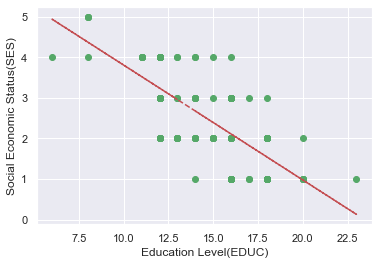

Enter model: svm


[2021-11-22 09:48:50,419] ERROR in app: Exception on /data [GET]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/var/folders/1t/mkff6jfj0n73x_zz057xgjbw0000gn/T/ipykernel_5836/514651207.py",

Best accuracy on validation set is: 0.733596837944664
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.7631578947368421
Test recall with the best C parameter is 0.7
Test AUC with the best C parameter is 0.7666666666666667
Execution time: 0.67 seconds


In [ ]:
app.run()